# Loan Listings Data Exploration
## by Adil Raheem

## Introduction
This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.Of the 81 variables, this dataset focuses on just 11 variables. They are: BorrowerAPR, BorrowerRate, StatedMonthlyIncome, LoanOriginalAmount, EmploymentStatusDuration, ProsperScore, ProsperRating (Alpha), IsBorrowerHomeowner, IncomeVerifiable, LoanStatus and EmploymentStatus.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#load dataset
loan_df = pd.read_csv('ProsperLoanData.csv')

In [3]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#take out only columns needed for analysis
columns_needed = ['BorrowerAPR','BorrowerRate','StatedMonthlyIncome','LoanOriginalAmount','EmploymentStatusDuration','ProsperScore','ProsperRating (Alpha)',
                 'IsBorrowerHomeowner','IncomeVerifiable', 'LoanStatus', 'EmploymentStatus']
#create a new dataframe that holds just needed columns
loan_data = loan_df[columns_needed]

In [5]:
#view summary of all numeric columns
print(loan_data.describe())

         BorrowerAPR   BorrowerRate  StatedMonthlyIncome  LoanOriginalAmount  \
count  113912.000000  113937.000000         1.139370e+05        113937.00000   
mean        0.218828       0.192764         5.608026e+03          8337.01385   
std         0.080364       0.074818         7.478497e+03          6245.80058   
min         0.006530       0.000000         0.000000e+00          1000.00000   
25%         0.156290       0.134000         3.200333e+03          4000.00000   
50%         0.209760       0.184000         4.666667e+03          6500.00000   
75%         0.283810       0.250000         6.825000e+03         12000.00000   
max         0.512290       0.497500         1.750003e+06         35000.00000   

       EmploymentStatusDuration  ProsperScore  
count             106312.000000  84853.000000  
mean                  96.071582      5.950067  
std                   94.480605      2.376501  
min                    0.000000      1.000000  
25%                   26.000000      4.

remove instances where categorical variables are null

In [6]:
#drop null values
loan_data = loan_data.dropna(subset =['EmploymentStatus','EmploymentStatusDuration','ProsperRating (Alpha)','ProsperScore'])

In [7]:
#get columns info 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BorrowerAPR               84834 non-null  float64
 1   BorrowerRate              84834 non-null  float64
 2   StatedMonthlyIncome       84834 non-null  float64
 3   LoanOriginalAmount        84834 non-null  int64  
 4   EmploymentStatusDuration  84834 non-null  float64
 5   ProsperScore              84834 non-null  float64
 6   ProsperRating (Alpha)     84834 non-null  object 
 7   IsBorrowerHomeowner       84834 non-null  bool   
 8   IncomeVerifiable          84834 non-null  bool   
 9   LoanStatus                84834 non-null  object 
 10  EmploymentStatus          84834 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 6.6+ MB


In [8]:
print(loan_data.shape)
print(loan_data.dtypes)
print(loan_data.head())

(84834, 11)
BorrowerAPR                 float64
BorrowerRate                float64
StatedMonthlyIncome         float64
LoanOriginalAmount            int64
EmploymentStatusDuration    float64
ProsperScore                float64
ProsperRating (Alpha)        object
IsBorrowerHomeowner            bool
IncomeVerifiable               bool
LoanStatus                   object
EmploymentStatus             object
dtype: object
   BorrowerAPR  BorrowerRate  StatedMonthlyIncome  LoanOriginalAmount  \
1      0.12016        0.0920          6125.000000               10000   
3      0.12528        0.0974          2875.000000               10000   
4      0.24614        0.2085          9583.333333               15000   
5      0.15425        0.1314          8333.333333               15000   
6      0.31032        0.2712          2083.333333                3000   

   EmploymentStatusDuration  ProsperScore ProsperRating (Alpha)  \
1                      44.0           7.0                     A   
3    

Note: It should be noted that after data cleaning there was no loan listing with ‘cancelled’ loan status anymore, this is accepted as there were only 5 loan listings with the status anyway

### What is the structure of your dataset?

After data cleaning, there are 84,834 loan listings in the dataset with 11 features. 5 variables are numeric in nature, two variables are boolean varables and 4 are categorical variables. ProsperRating (Alpha) and ProsperScore are ordered factor variables with the following definition and levels:<br>
<br>
**Definitons:<br>**
ProsperRating: This is a rating that allows potential investors to easily consider a loan application's level of risk<br>
ProsperScore: This is a score that ranges from 1 to 11 with 11 being the best or lowest risk score<br>
<br>
**(worst) high risk ——> (best) lowest risk<br>**
ProsperRating (Alpha) : HR, E, D, C, B, A, AA <br>
ProsperScore: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11


### What is/are the main feature(s) of interest in your dataset?

I am trying to find out what affects loan's outcome status and borrower's APR and also what effects they have on other variables, if any.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that loan original amount, monthly income, prosper rating and prosper score will have the strongest effect on loan's outcome status. I also think borrower's annual percentage rate will have strong effects on loan's outcome status but to a much smaller degree.

## Univariate Exploration
I start by looking at the main variables of interest

Question

What is the distribution of the main variable of interest (i.e loan status outome)

In [9]:
#function for descending order
def cat_order(x):
    return loan_data[x].value_counts().index
#function for plot color
def base_color():
    return sns.color_palette()[0]

In [10]:
#get loan status value counts
loan_data['LoanStatus'].value_counts()

Current                   56566
Completed                 19657
Chargedoff                 5334
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

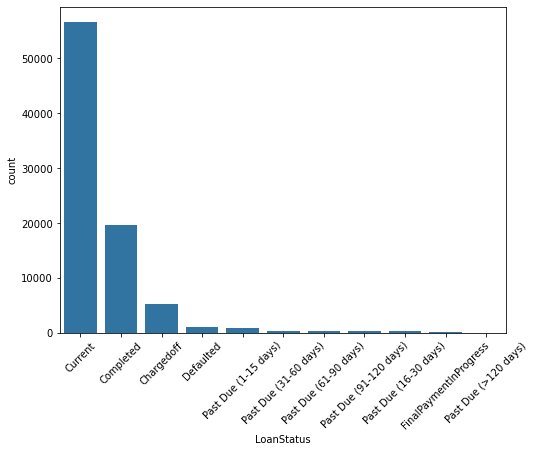

In [11]:
#set figgure size
plt.figure(figsize=[8,6])
# get a countplot
sns.countplot(data = loan_data, x='LoanStatus', order=cat_order('LoanStatus'), color=base_color())
plt.xticks(rotation=45);

In [12]:
# hold categories to be renamed
to_be_replaced = ['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)',
                                          'Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)' ]
# set all intended categories to their new value
loan_data.loc[loan_data['LoanStatus'].isin(to_be_replaced), 'LoanStatus'] = 'Past Due'

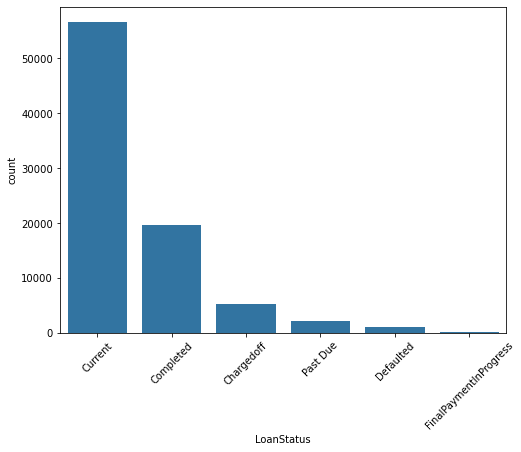

In [13]:
plt.figure(figsize=[8,6])
#create a count plot
sns.countplot(data = loan_data, x='LoanStatus', order=cat_order('LoanStatus'), color=base_color())
# rotate x ticks 
plt.xticks(rotation=45);

### Observations
Most of the loan listing outcomes were current or completed with very few in final payment progress or cancelled.

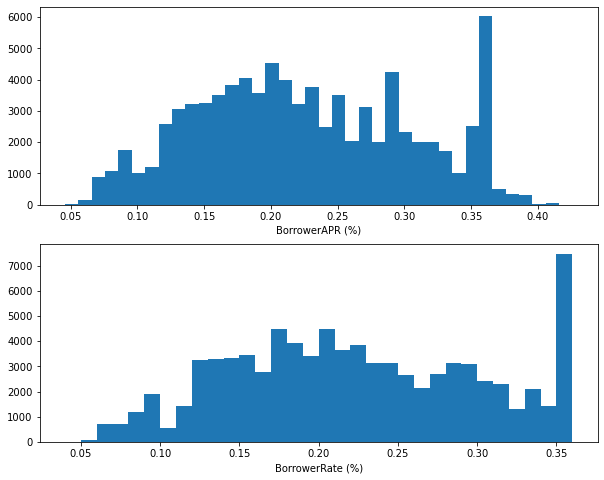

In [14]:
#set figure size and number of rows
fig, ax = plt.subplots(nrows=2, figsize=[10,8])
variables=[ 'BorrowerAPR','BorrowerRate']

# for-loop to loop through both variables
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_data[var]), max(loan_data[var]) + 0.01, 0.01)
    ax[i].hist(data=loan_data, x='BorrowerAPR', bins=bins)
    ax[i].set_xlabel('{} (%)'.format(var))

#### Observation
Interestingly, the chart shape are similar to one another as expected. It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with Loan status.

Next up, the distribution of the first predictor variable: stated monthly income

In [15]:
#et summary statistics of stated monthly income
loan_data['StatedMonthlyIncome'].describe()

count    8.483400e+04
mean     5.931349e+03
std      8.240672e+03
min      0.000000e+00
25%      3.438667e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [16]:
#change datatype to integer
loan_data['StatedMonthlyIncome']=loan_data['StatedMonthlyIncome'].astype(int)

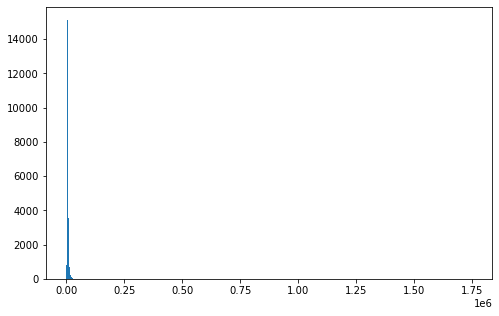

In [17]:
#specify bins
bins = np.arange(0.5, loan_data['StatedMonthlyIncome'].max()+ 1000, 1000 )
plt.figure(figsize=[8,5])

#create an histogram plot
plt.hist(data = loan_data, x='StatedMonthlyIncome', bins=bins)
plt.show();



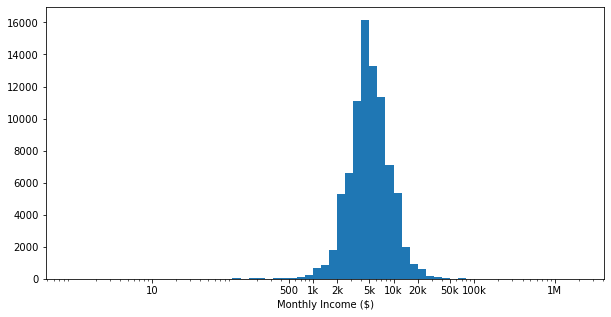

In [18]:
#specify bin size
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(loan_data['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
#create histogram plot
plt.hist(data = loan_data, x = 'StatedMonthlyIncome', bins = bins)
#apply log transformation on x-axis variable
plt.xscale('log')
#set x ticks and x ticklabels
plt.xticks([10, 500,1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 1e6], ['10','500', '1k', '2k', '5k','10k','20k','50k','100k','1M'])
#set x axis label/title
plt.xlabel('Monthly Income ($)')
plt.show()

### Observation
Monthly Income had a long tail, it might not be visible on the chart but the x-axis ticks suggest many values to the right of the chart. When plotted on a log scale, the monthly income distribution looks unimodal with its peak around 5000.

second predictor variable: distribution of Loan Original Amount

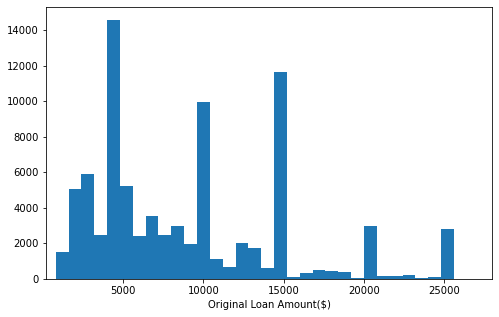

In [19]:
#set figure size
plt.figure(figsize=[8,5])
#specify bin
bins = np.arange(0, loan_data['LoanOriginalAmount'].max()+800 ,800 )
#create a histogram
plt.hist(data= loan_data, x='LoanOriginalAmount', bins=bins)
#set x axis limit
plt.xlim([200,28000])
#set x axis label/title
plt.xlabel('Original Loan Amount($)');

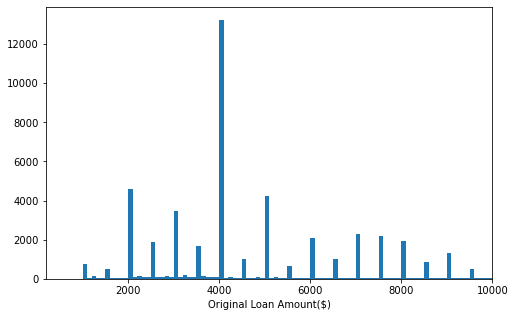

In [20]:
#set figure size
plt.figure(figsize=[8,5])
#specify bin
bins = np.arange(0, loan_data['LoanOriginalAmount'].max()+100 ,100 )
#create a histogram
plt.hist(data= loan_data, x='LoanOriginalAmount', bins=bins)
#set x limits
plt.xlim([200,10000])
#set x axis label/title
plt.xlabel('Original Loan Amount($)');

### Observation
The charts are still similar even after investigating further on a smaller bin size. There are large spikes at frequency bars with multiples of 500 and frequency bars trail offs until the next spike. This shows that most loan original amount were figures in multiples of 500.

Take a look at the final predictor variables distribution: Prosper rating and prosper score

In [21]:
loan_data['ProsperRating (Alpha)'].value_counts()

C     18340
B     15579
A     14549
D     14268
E      9795
HR     6932
AA     5371
Name: ProsperRating (Alpha), dtype: int64

In [22]:
#setting permanent order for prosper rating
ordinal_var_dict = {'ProsperRating (Alpha)' :['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories= ordinal_var_dict[var] )
    loan_data[var] = loan_data[var].astype(ordered_var)

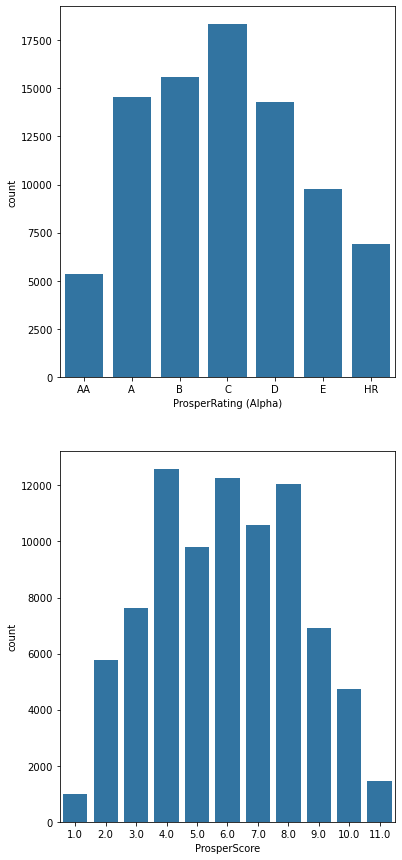

In [23]:
#set figure size and number of rows
fig, ax = plt.subplots(nrows =2,figsize=[6,15])

#create count plots
sns.countplot(data=loan_data, x='ProsperRating (Alpha)', color = base_color(), ax=ax[0])
sns.countplot(data=loan_data, x='ProsperScore', color = base_color(),ax=ax[1]);

### Observation
prosper rating 'C' has the highest frequency, the ratings seem to be normaly distributed. Prosper score has 3 peaks, one is the average prosper score (6) and the other two are found on both sides of the average prosper score 

I'll look at other features in the data to see if any of them holds interesting properties

In [24]:

loan_data['EmploymentStatusDuration'].fillna(0, inplace=True)


In [25]:
# convert data type from float to integer
loan_data['EmploymentStatusDuration'] = loan_data['EmploymentStatusDuration'].astype(int)

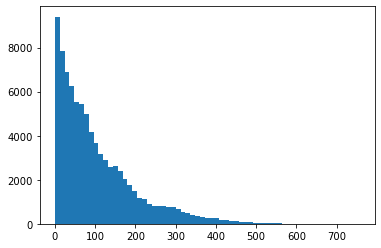

In [26]:
#specify bins range
bins = np.arange(0,loan_data['EmploymentStatusDuration'].max()+12,12)
#create a histogram
plt.hist(data=loan_data, x='EmploymentStatusDuration', bins=bins);

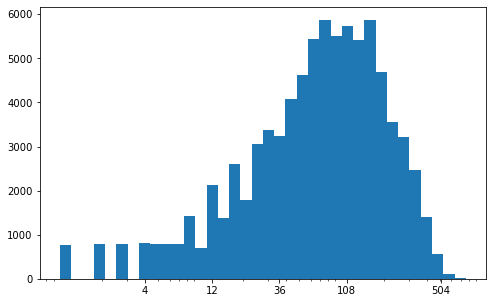

In [27]:
#set figure size
plt.figure(figsize=[8,5])
#specify bins size
log_binsize = 0.08
#specify bins range
bin_edges = 10 ** np.arange(0, np.log10(loan_data['EmploymentStatusDuration'].max())+log_binsize, log_binsize)
#create a histogram plot
plt.hist(data = loan_data, x='EmploymentStatusDuration', bins= bin_edges)
#apply log transformation on x-axis variable
plt.xscale('log')
plt.xticks([4,12,36,108,504],[4,12,36,108,504]);


### Observation
Employment status duration had a long tail with lot of the borrowers in the low duration end. When plotted on a log-scale, the duration distribution looks roughly multimodal, with the peaks at 84, 96, 108 and 120 months.

A look at employment status distribution

In [28]:
loan_data['EmploymentStatus'].value_counts()

Employed         67309
Full-time         7917
Self-employed     4536
Other             3800
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

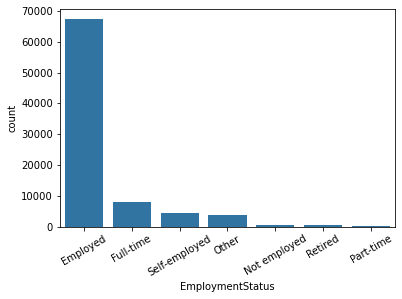

In [29]:
#create count plot
sns.countplot(data=loan_data, x='EmploymentStatus', color=base_color(), order= cat_order('EmploymentStatus'))
#rotate x-axis ticks
plt.xticks(rotation=30);

### Observation
The employment status of the borrowers in the dataset is generally good with most of them either employed or in a full time job.

Boolean predictor variables: Home owner and Verified income 

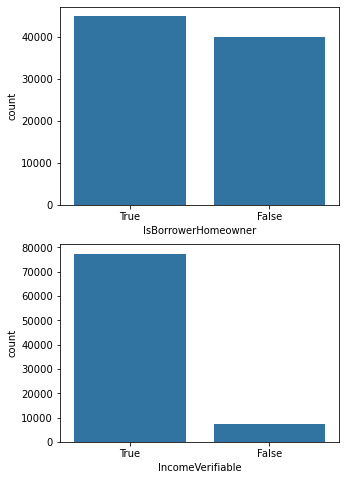

In [30]:
#set figure size and number of rows
fig,ax = plt.subplots(nrows=2,figsize=[5,8])
#create count plots
sns.countplot(data=loan_data, x='IsBorrowerHomeowner', color=base_color(), order= cat_order('IsBorrowerHomeowner'), ax=ax[0])
sns.countplot(data=loan_data, x='IncomeVerifiable', color=base_color(), order= cat_order('IncomeVerifiable'), ax=ax[1]);

### Observation
There isn't much difference between borrowers that are home owners and those that aren't. Most of the loan listings in the dataset had the borrower's income verified 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The monthly income variable took on a very large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with its peak at $5000.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the monthly income variable, outliers were identified but these will only be removed later on if hey have an effect on having a visible plot. when investigating the loan status, Past due status was sub-categorised based on days (i.e having 5 different categories), since all these columns had very little counts and all meant the same thing, i joined them together and categorised them under just a category 'Past Due'.

## Bivariate Exploration

In this section, I investigated relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [31]:
#hold numeric variables together
numeric_vars= ['BorrowerAPR','BorrowerRate','StatedMonthlyIncome','LoanOriginalAmount']
#hold categorical variables together
cat_vars = [ 'LoanStatus', 'EmploymentStatus','ProsperRating (Alpha)','ProsperScore']

I start off by looking at the pairwise correlation

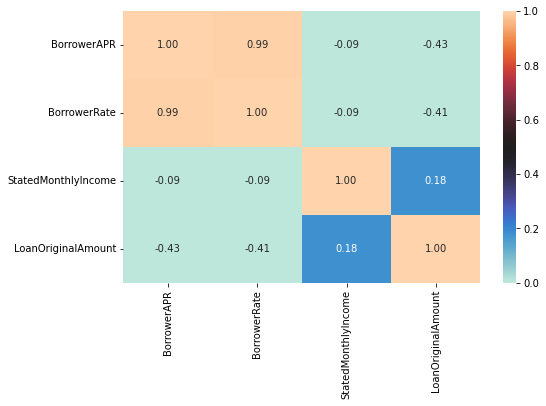

In [32]:
#set figure size
plt.figure(figsize=[8,5])
#plot a heatmap
sns.heatmap(loan_data[numeric_vars].corr(), annot=True, fmt='.2f', vmin=0, cmap='icefire');

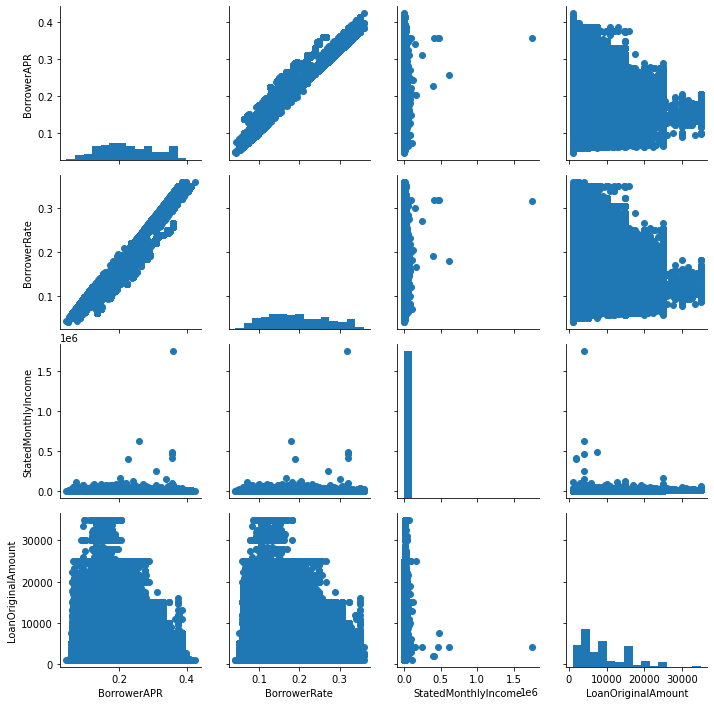

In [45]:
#create a pair grid for all numerical variables
g= sns.PairGrid(data=loan_data, vars=numeric_vars)
#set plots on the diagonal to be plotted as histograms
g.map_diag(plt.hist,bins=15)
#set plots not on diagonal to be plotted as scatter plots
g.map_offdiag(plt.scatter)

### Observation
Only BorrowerAPR and BorowerRate are highly correlated, this is expected as both variables have values similar to each other. Only the BorrowerAPR will be used in subsequent analysis to represent the interest on the loan. This is no strong correlation among other pairs, therefore, there won't be any further analysis on them. 

Now, lets look at how borrower APR and stated monthly income correlates with categorical variables

C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWa

<Figure size 1080x720 with 0 Axes>

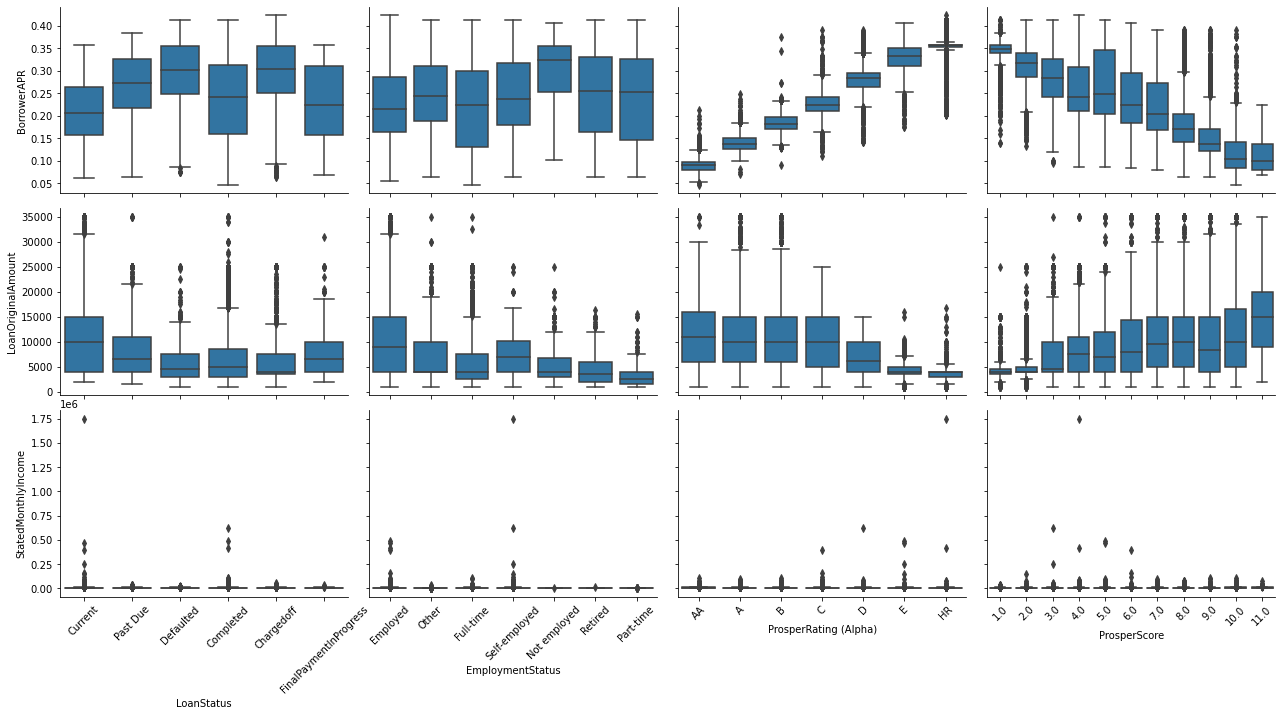

In [44]:
#Using a random sample of 10000 loan listing

# random_samples = np.random.choice(loan_data.shape[0], 1000, replace=False)
# loan_samples = loan_data.loc[random_samples,:]
#create a fuction to create a boxplot
def boxgrid(x,y, **kwargs):
    sns.boxplot(x,y, color=base_color())

#set figure size
plt.figure(figsize = [15, 10])
#create a pair grid
g= sns.PairGrid(data=loan_data, x_vars= ['LoanStatus', 'EmploymentStatus','ProsperRating (Alpha)','ProsperScore'], 
                y_vars=['BorrowerAPR','LoanOriginalAmount','StatedMonthlyIncome'] ,
                size=3, aspect =1.5)
#set the plots to be rendered as boxplots using the boxgrid function
g.map(boxgrid)
#rotate all x-axis ticks
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show();


### Observation
There are both positive and negative relationships between the categorical variables and the 3 numeric variables of interest. The best prosper rating and prosper score (AA and 11 respetively) seem to have the lowest borrower annual percentage rate(BorrowerAPR) and the highest loan amount.   

It is not surprising that listings with Past Due status, charged off and defaulted status have the highest borrower's APR, this might be why the payments aren't paid on time or for a certain period of time and for the charged off status, payments aren't even being made at all. This suggests that high borrower APR results more in late payment or non-payment.<br>

The stated monthly income variable has no interactable chart,because of its very small range of values within the lower and upper quartile. This will be worth more investigation to have a clear shape to depict its trend.

The loan listings with current have the highest loan original amount. Of the other loan outcome status, Past Due slightly has the higher loan original amount, it seems like loan listings with high loan original amount do not pay within the specified time constraints. Interestingly, the median values of completed, defaulted and charged off loan status are approximately the same, there is only a slight differece in their range of values. The past due median value is also not far off from the completed status either. It seems that loan original amount doesn't have much effect on loan status but before making any conclusions, I will have to be investigate further on this by categorizing the loan statuses into two categories namely success loans and failed loans. This will be carried out during multivariate exploration

Monthly income and categorical variables

In [46]:
#function to hold outliers
def remove_outliers (DataFrame, target_column):
    Q1 = DataFrame[target_column].quantile(0.25)
    Q3 = DataFrame[target_column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_1 = Q1 - 1.5 * IQR
    outlier_2 = Q3 + 1.5 * IQR
    
    DataFrame = DataFrame.loc[((DataFrame[target_column] < outlier_1) | (DataFrame[target_column] > outlier_2 ))]
    return DataFrame



In [47]:
#create a dataframe holding outlier rows
income_outliers = remove_outliers(loan_data, 'StatedMonthlyIncome')
#return a dataframe with no outliers
income_no_outlier = loan_data[~loan_data['StatedMonthlyIncome'].isin
                                                      (income_outliers['StatedMonthlyIncome'])]

C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWa

<Figure size 1800x1440 with 0 Axes>

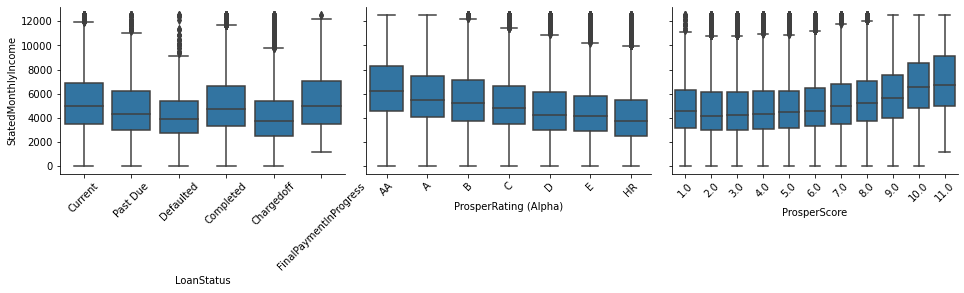

In [48]:
#set figure size
plt.figure(figsize = [25, 20])
#create a fuction to create a boxplot
g= sns.PairGrid(data=income_no_outlier, x_vars= ['LoanStatus', 'ProsperRating (Alpha)','ProsperScore'], 
                y_vars=['StatedMonthlyIncome'] ,
                size=3, aspect =1.5)
#set the plots to be rendered as boxplots using the boxgrid function
g.map(boxgrid)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show();

### Observation
There is a positive relationship between prosper score and stated monthly income, prosper rating and stated monthly income also have strong interactions as monthly income decreases with decreased rating. prosper score and stated monthly income. Defaulted and ChargedOff loan outcome status seems to be more common with lower monthly income earners. Past Due and completed seems to also have approximately the same range of values here too,this will monitored during further investigation on loan status as stated above

Relationship between the categorical variables

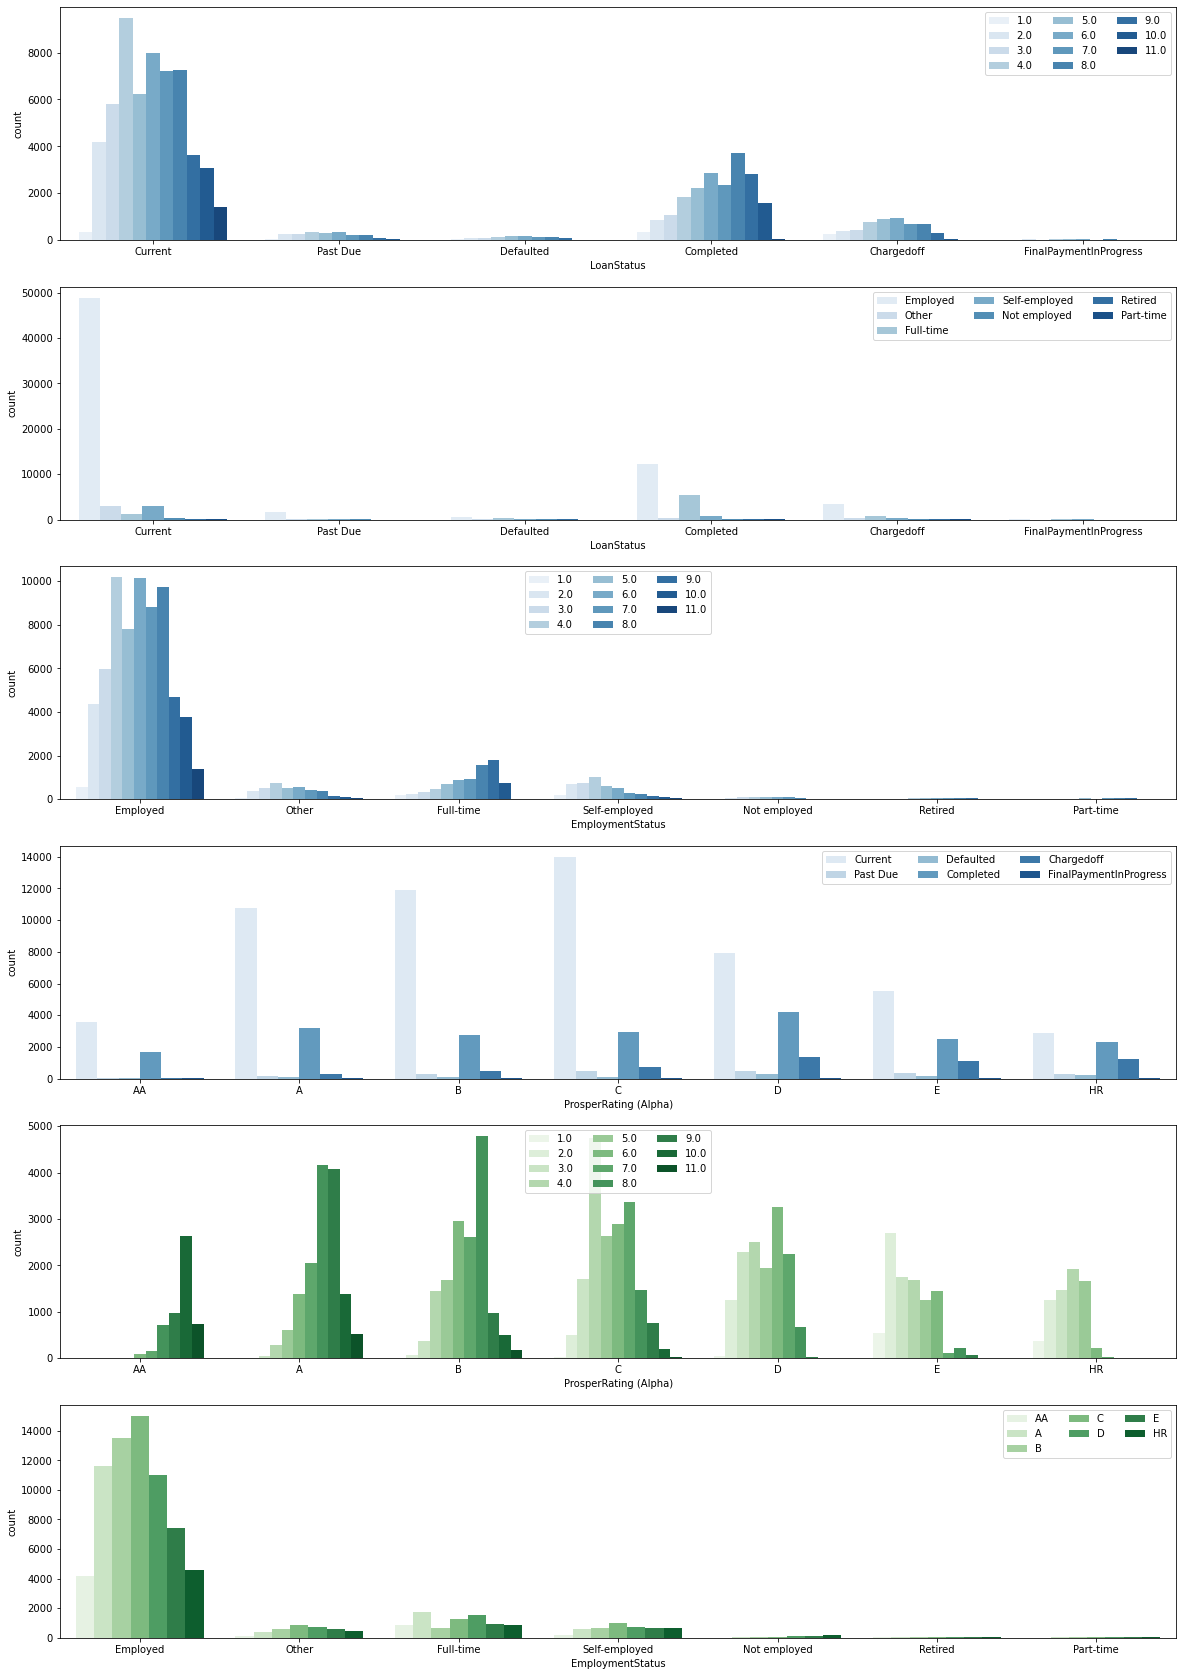

In [49]:
#set figure size
plt.figure(figsize=[20,30])

#set subplot position
ax= plt.subplot(6,1,1)
#create count plot
sns.countplot(data=loan_data, x='LoanStatus', hue='ProsperScore', palette='Blues')
#set legends to line up in 3 rows
ax.legend(ncol=3)

ax= plt.subplot(6,1,2)
sns.countplot(data=loan_data, x='LoanStatus', hue='EmploymentStatus',palette='Blues')
ax.legend(loc=1, ncol=3)

ax= plt.subplot(6,1,3)
sns.countplot(data=loan_data, x='EmploymentStatus', hue='ProsperScore',palette='Blues')
ax.legend(ncol=3)

ax= plt.subplot(6,1,4)
sns.countplot(data=loan_data, hue='LoanStatus',x='ProsperRating (Alpha)', palette='Blues')
ax.legend(ncol=3)

ax= plt.subplot(6,1,5)
sns.countplot(data=loan_data, x='ProsperRating (Alpha)', hue='ProsperScore', palette='Greens')
ax.legend(ncol=3)

ax= plt.subplot(6,1,6)
sns.countplot(data=loan_data,x='EmploymentStatus', hue = 'ProsperRating (Alpha)',palette='Greens')
ax.legend(ncol=3)
plt.show();

There are more self employed applicants in the lower range of proper score, full time employees have more of thier loan applicants in the high proper score range. Employed applicants have a roughly normal distribution of proper score.
There doesn't seem to be much interaction between prosper rating and loan status as well as employment status and loan status.
There are slightly larger interactions between prosper score and prosper rating especially in higher ratings of C, B, A.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There was an interesting relationship between Loan original amount and the prosper variables, the Loan original amount increased with an increasing ProsperScore and ProsperRating. Another major interacting factor is that better prosper rating or prosper score were associated with lower borrower's APR.<BR>

Higher borrower's APR was also associated more with Past Due loan staus and Charged off status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Borrower rate and borowwer APR why were linearly correlated. Interest rate refers to the annual cost of a loan to a borrower and is expressed as a percentage while APR is the annual cost of a loan to a borrower,including fees which are usually low, hence the linear correlation .

## Multivariate Exploration

In [50]:
#create new dataframe to hold all required loan status
new_loan_df = loan_data[(loan_data['LoanStatus'] == 'Completed') | (loan_data['LoanStatus'] == 'Defaulted') | (loan_data['LoanStatus'] == 'Expired')|
(loan_data['LoanStatus'] == 'ChargedOff') | (loan_data['LoanStatus'] == 'Past Due')]

In [51]:
#set variables regarded as failed loans
failed_loan = ['Defaulted','ChargedOff', 'Past Due', 'Expired']
#set variables regarded as success loans
successful = ['Completed']

#rename the categories with their new categorical names
new_loan_df.loc[new_loan_df['LoanStatus'].isin(failed_loan), 'LoanStatus'] = 'Failed'
new_loan_df.loc[new_loan_df['LoanStatus'].isin(successful), 'LoanStatus'] = 'Success'

C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
#rename loan status column in the new dataframe
new_loan_df.rename(columns={'LoanStatus':'LoanStatusOutcome'}, inplace =True)

C:\Users\ADIL\Anaconda32\envs\my_environment\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


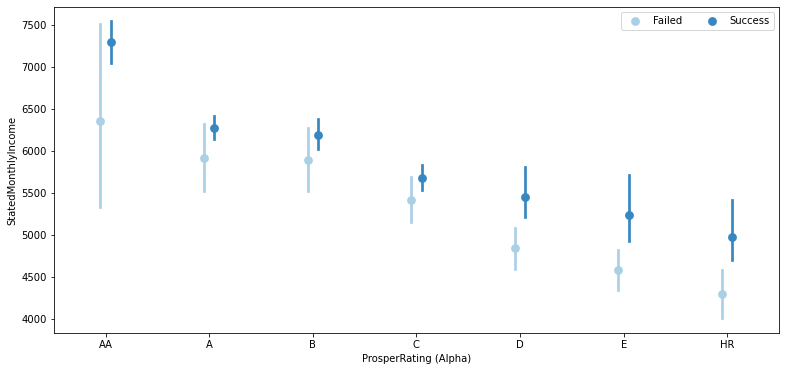

In [53]:
#set figure size
plt.figure(figsize = [13,6])
#create a point plot
ax= sns.pointplot(data=new_loan_df, hue='LoanStatusOutcome', x='ProsperRating (Alpha)', y='StatedMonthlyIncome',
                  palette='Blues',dodge=0.1, linestyles='')
#set legends to line up in 3 rows
ax.legend(ncol=3)

A dodged point plot for the listings shows the clear influence of stated monthly income and prosper rating on loan outcome. The larger error bars on left side are due to low number of loan listings at higher Prosper ratings

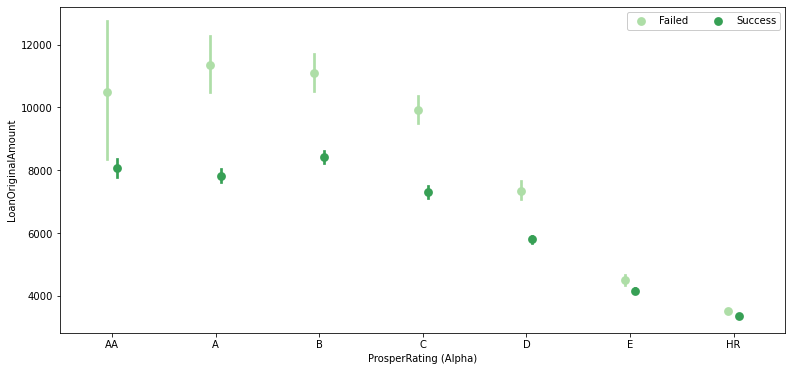

In [54]:
#set figure size
plt.figure(figsize = [13,6])
#create a point plot
ax= sns.pointplot(data=new_loan_df, hue='LoanStatusOutcome', x='ProsperRating (Alpha)', y='LoanOriginalAmount', palette='Greens',
                  dodge=0.1, linestyles='')
#set legends to line up in 3 rows
ax.legend(ncol=3, framealpha=1)

### Observation
A dodged point plot for the listings shows the clear influence of loan original amount and prosper rating on loan outcome.
The larger error bars on left side are due to low number of loan listings at higher Prosper ratings 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation on relationship between prosper score, stated monthly income and loan outcome. The multivariate exploration showed that there is a positive effect of increased stated monthly income on prosper rating and for each prosper rating, lower monthly income is associated with failed loan outcome.
In the relationship between prosper score, loan original amount and loan outcome. The multivariate exploration showed that there is a positive effect of increased loan original amount on prosper rating, for each rating, higher loan original amount is associated with failed loan outcome status.

### Were there any interesting or surprising interactions between features?

The error bars on the right hand side were very long for failed loan outcomes, this was due to fewer loan listing in better prosper ratings range. This shows that there were fewer loan listings that failed in the higher prosper ratings than there are in the lower prosper ratings.
In geveral, moving to the right end of the ratings (the best ratings),  there were more loan listings with a success outome than those with failed outcome

## Conclusions


The main variables in focus (Loan status and Borrower APR) are seen to be affected by the other four variables of interest (stated monthly income, loan original amount, prosper score and prosper rating). Cleaning the dataset by removing all null values did not affect the dataset and outcome of the analysis. Removing montly income outliers were very effective in having a visible interaction between it and other variables. By categorizing loan statuses into two outcomes, its relationships with other variables were easily identified.

In summary, there is an inversely proportional relationship between both prosper rating and prosper scores with borrower’s APR. As prosper rating and scores increase, the borrower’s APR decreases, this shows that borrower’s APR is affected by prosper variables. Increased Borrower’s APR was also associated to failed loan outcome status as loan statuses with late payment or no payment at all had the highest borrower’s APR. Loan outcome status is therefore affected by borrower APR. Failed loan outcome status is also seen to be associated with high loan original amount and low stated monthly income while loan success is associated with low original amount and high monthly income. Loan Status is therefore affected by both the loan original amount and stated monthly income.

